In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [2]:
df = pd.read_csv("dataFrameFinal.csv")

In [3]:
all_target = ["rarity_COMMON", "rarity_EPIC","rarity_FREE","rarity_LEGENDARY", "rarity_RARE"]
t0=df.rarity_FREE.values
t1=df.rarity_COMMON.values
t2=df.rarity_RARE.values
t3=df.rarity_EPIC.values
t4=df.rarity_LEGENDARY.values
all_t=[t0,t1,t2,t3,t4]
variable = [col for col in df.columns  if col not in  all_target]
X=df[variable]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, t4, test_size=0.3, stratify=t4)

In [20]:
split_accuracy = []
split_precision = []
split_recall = []
split_f1 = []
best_accuracy = 0
best_k = 0

for i in range(1, 20, 1):
    #print(f"k={i}")
    knn = KNeighborsClassifier(n_neighbors=i, p=1)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    precision = precision_score(y_test, prediction)
    #print(f"Accuracy: {accuracy_score(y_test, prediction)}")
    split_accuracy.append(accuracy_score(y_test, prediction))
    split_precision.append(precision_score(y_test, prediction))
    split_recall.append(recall_score(y_test, prediction))
    split_f1.append(f1_score(y_test, prediction))
    if (i==14) : 
        accuracy = accuracy_score(y_test, prediction)
        precision = precision_score(y_test, prediction)
        recall = recall_score(y_test, prediction)
        f1 = f1_score(y_test, prediction)
        print(f" ========= target : rarity_LEGENDARY")
        print(f"accuracy : {accuracy}")
        print("====================")
        print(f"precision : {precision}")
        print("====================")
        print(f"recall : {recall}")
        print("====================")
        print(f"f1-score : {f1}")
     
    if precision > best_accuracy:
        best_accuracy = precision
        best_k = i
        
        
    
print(f"Meilleur k avec la meilleure precision: k={best_k}, precision={best_accuracy}" )

 ========= target : rarity_LEGENDARY
accuracy : 0.8882554161915621
precision : 0.7401574803149606
recall : 0.3657587548638132
f1-score : 0.4895833333333333
Meilleur k avec la meilleure precision: k=14, precision=0.7401574803149606


Text(0.5, 1.0, 'target : rarity_LEGENDARY')

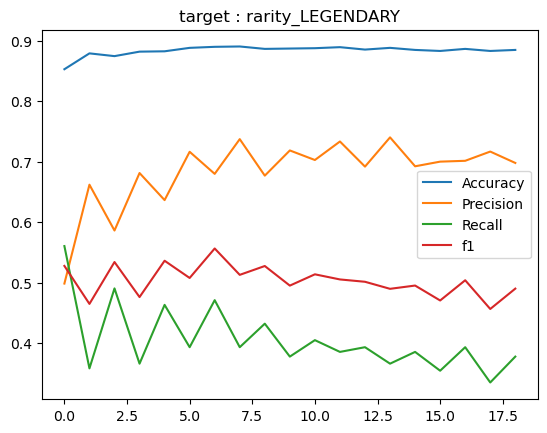

In [17]:
plt.plot(split_accuracy, label="Accuracy")
plt.plot(split_precision, label="Precision")
plt.plot(split_recall, label="Recall")
plt.plot(split_f1, label="f1")
plt.legend()
plt.title("target : rarity_LEGENDARY")

In [ ]:
#Cross validation

In [26]:
mean_acc = 0
mean_prec = 0
mean_rec = 0
mean_f1 = 0
kfold=KFold(n_splits=5,shuffle=True)
cross_val_accuracy = cross_val_score(estimator=knn, X=X, y=t4, scoring="accuracy", cv=kfold) 
mean_acc = cross_val_accuracy.mean()
cross_val_precision = cross_val_score(estimator=knn, X=X, y=t4, scoring="precision", cv=kfold)
mean_prec = cross_val_precision.mean()
cross_val_accuracy_std = cross_val_score(estimator=knn, X=X, y=t4, scoring="recall", cv=kfold)
mean_rec = cross_val_accuracy_std.mean()
cross_val_f1 = cross_val_score(estimator=knn, X=X, y=t4, scoring="f1", cv=kfold)
mean_f1 = cross_val_f1.mean()

print(f" ========= k-fold validation accuracy : {mean_acc}")
print(f" ========= k-fold validation precision : {mean_prec}")
print(f" ========= k-fold validation recall : {mean_rec}")
print(f" ========= k-fold validation f1-score : {mean_f1}")


 ========= k-fold validation accuracy : 0.8809238665526091
 ========= k-fold validation precision : 0.7157545164147276
 ========= k-fold validation recall : 0.32427607806851033
 ========= k-fold validation f1-score : 0.4358431895141071


 ========= target : rarity_FREE
accuracy : 0.9521094640820981
precision : 0.9126984126984127
recall : 0.6117021276595744
f1-score : 0.732484076433121
Meilleur k avec la meilleure precision: k=14, precision=0.9416666666666667


Text(0.5, 1.0, 'target : rarity_FREE')

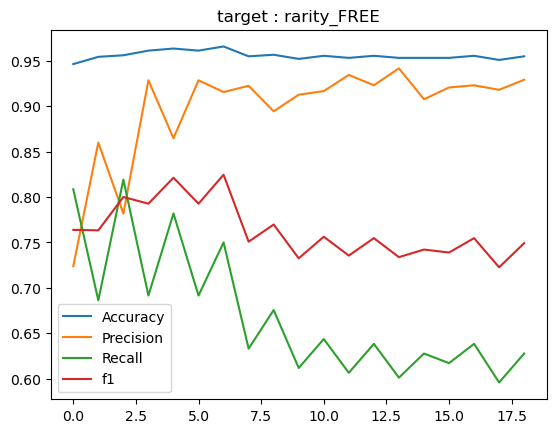

In [23]:
#rarity_FREE
X_train, X_test, y_train, y_test = train_test_split(X,t0, test_size=0.3, stratify=t0)
split_accuracy = []
split_precision = []
split_recall = []
split_f1 = []
best_accuracy = 0
best_k = 0
for i in range(1, 20, 1):
    #print(f"k={i}")
    knn = KNeighborsClassifier(n_neighbors=i, p=1)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    precision = precision_score(y_test, prediction)
    #print(f"Accuracy: {accuracy_score(y_test, prediction)}")
    split_accuracy.append(accuracy_score(y_test, prediction))
    split_precision.append(precision_score(y_test, prediction))
    split_recall.append(recall_score(y_test, prediction))
    split_f1.append(f1_score(y_test, prediction))

    if (i==10) : 
        accuracy = accuracy_score(y_test, prediction)
        precision = precision_score(y_test, prediction)
        recall = recall_score(y_test, prediction)
        f1 = f1_score(y_test, prediction)
        print(f" ========= target : rarity_FREE")
        print(f"accuracy : {accuracy}")
        print("====================")
        print(f"precision : {precision}")
        print("====================")
        print(f"recall : {recall}")
        print("====================")
        print(f"f1-score : {f1}")
            
    if precision > best_accuracy:
        best_accuracy = precision
        best_k = i
print(f"Meilleur k avec la meilleure precision: k={best_k}, precision={best_accuracy}" )
plt.plot(split_accuracy, label="Accuracy")
plt.plot(split_precision, label="Precision")
plt.plot(split_recall, label="Recall")
plt.plot(split_f1, label="f1")
plt.legend()
plt.title("target : rarity_FREE")



In [25]:
mean_acc = 0
mean_prec = 0
mean_rec = 0
mean_f1 = 0
kfold=KFold(n_splits=5,shuffle=True)
cross_val_accuracy = cross_val_score(estimator=knn, X=X, y=t0, scoring="accuracy", cv=kfold) 
mean_acc = cross_val_accuracy.mean()
cross_val_precision = cross_val_score(estimator=knn, X=X, y=t0, scoring="precision", cv=kfold)
mean_prec = cross_val_precision.mean()
cross_val_accuracy_std = cross_val_score(estimator=knn, X=X, y=t0, scoring="recall", cv=kfold)
mean_rec = cross_val_accuracy_std.mean()
cross_val_f1 = cross_val_score(estimator=knn, X=X, y=t0, scoring="f1", cv=kfold)
mean_f1 = cross_val_f1.mean()


print(f" ========= k-fold validation accuracy : {mean_acc}")
print(f" ========= k-fold validation precision : {mean_prec}")
print(f" ========= k-fold validation recall : {mean_rec}")
print(f" ========= k-fold validation f1-score : {mean_f1}")


 ========= Average k-fold validation accuracy : 0.956201881950385
 ========= Average k-fold validation precision : 0.9064131391383592
 ========= Average k-fold validation recall : 0.6644940597000274
 ========= Average k-fold validation f1-score : 0.7617949546509353


 ========= target : rarity_COMMON
accuracy : 0.6733181299885975
precision : 0.5566037735849056
recall : 0.29064039408866993
f1-score : 0.3818770226537217
Meilleur k avec la meilleure precision: k=18, precision=0.6445182724252492


Text(0.5, 1.0, 'target : rarity_COMMON')

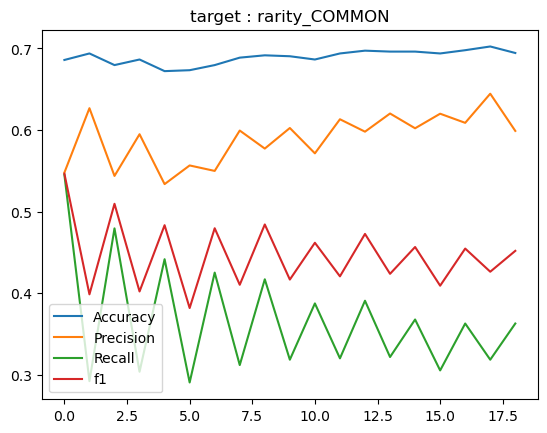

In [28]:
#rarity_COMMON
X_train, X_test, y_train, y_test = train_test_split(X,t1, test_size=0.3, stratify=t1)
split_accuracy = []
split_precision = []
split_recall = []
split_f1 = []
best_accuracy = 0
best_k = 0
for i in range(1, 20, 1):
    #print(f"k={i}")
    knn = KNeighborsClassifier(n_neighbors=i, p=1)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    precision = precision_score(y_test, prediction)
    #print(f"Accuracy: {accuracy_score(y_test, prediction)}")
    split_accuracy.append(accuracy_score(y_test, prediction))
    split_precision.append(precision_score(y_test, prediction))
    split_recall.append(recall_score(y_test, prediction))
    split_f1.append(f1_score(y_test, prediction))

    if (i==6) : 
        accuracy = accuracy_score(y_test, prediction)
        precision = precision_score(y_test, prediction)
        recall = recall_score(y_test, prediction)
        f1 = f1_score(y_test, prediction)
        print(f" ========= target : rarity_COMMON")
        print(f"accuracy : {accuracy}")
        print("====================")
        print(f"precision : {precision}")
        print("====================")
        print(f"recall : {recall}")
        print("====================")
        print(f"f1-score : {f1}")
            
    if precision > best_accuracy:
        best_accuracy = precision
        best_k = i
print(f"Meilleur k avec la meilleure precision: k={best_k}, precision={best_accuracy}" )
plt.plot(split_accuracy, label="Accuracy")
plt.plot(split_precision, label="Precision")
plt.plot(split_recall, label="Recall")
plt.plot(split_f1, label="f1")
plt.legend()
plt.title("target : rarity_COMMON")

In [29]:
mean_acc = 0
mean_prec = 0
mean_rec = 0
mean_f1 = 0
kfold=KFold(n_splits=5,shuffle=True)
cross_val_accuracy = cross_val_score(estimator=knn, X=X, y=t1, scoring="accuracy", cv=kfold) 
mean_acc = cross_val_accuracy.mean()
cross_val_precision = cross_val_score(estimator=knn, X=X, y=t1, scoring="precision", cv=kfold)
mean_prec = cross_val_precision.mean()
cross_val_accuracy_std = cross_val_score(estimator=knn, X=X, y=t1, scoring="recall", cv=kfold)
mean_rec = cross_val_accuracy_std.mean()
cross_val_f1 = cross_val_score(estimator=knn, X=X, y=t1, scoring="f1", cv=kfold)
mean_f1 = cross_val_f1.mean()

print(f" ========= k-fold validation accuracy : {mean_acc}")
print(f" ========= k-fold validation precision : {mean_prec}")
print(f" ========= k-fold validation recall : {mean_rec}")
print(f" ========= k-fold validation f1-score : {mean_f1}")


 ========= k-fold validation accuracy : 0.6927288280581694
 ========= k-fold validation precision : 0.5703240581017679
 ========= k-fold validation recall : 0.3766420178278157
 ========= k-fold validation f1-score : 0.4556309148353945


 ========= target : rarity_RARE
accuracy : 0.7348916761687572
precision : 0.3652173913043478
recall : 0.0967741935483871
f1-score : 0.15300546448087432
Meilleur k avec la meilleure precision: k=18, precision=0.49206349206349204


Text(0.5, 1.0, 'target : rarity_RARE')

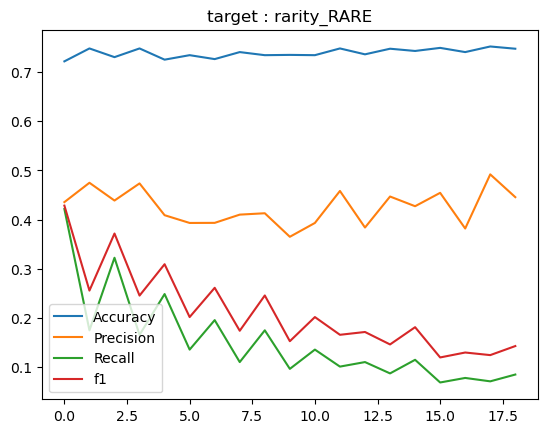

In [30]:
#rarity_RARE
X_train, X_test, y_train, y_test = train_test_split(X,t2, test_size=0.3, stratify=t2)
split_accuracy = []
split_precision = []
split_recall = []
split_f1 = []
best_accuracy = 0
best_k = 0
for i in range(1, 20, 1):
    #print(f"k={i}")
    knn = KNeighborsClassifier(n_neighbors=i, p=1)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    precision = precision_score(y_test, prediction)
    #print(f"Accuracy: {accuracy_score(y_test, prediction)}")
    split_accuracy.append(accuracy_score(y_test, prediction))
    split_precision.append(precision_score(y_test, prediction))
    split_recall.append(recall_score(y_test, prediction))
    split_f1.append(f1_score(y_test, prediction))

    if (i==10) : 
        accuracy = accuracy_score(y_test, prediction)
        precision = precision_score(y_test, prediction)
        recall = recall_score(y_test, prediction)
        f1 = f1_score(y_test, prediction)
        print(f" ========= target : rarity_RARE")
        print(f"accuracy : {accuracy}")
        print("====================")
        print(f"precision : {precision}")
        print("====================")
        print(f"recall : {recall}")
        print("====================")
        print(f"f1-score : {f1}")
            
    if precision > best_accuracy:
        best_accuracy = precision
        best_k = i
print(f"Meilleur k avec la meilleure precision: k={best_k}, precision={best_accuracy}" )
plt.plot(split_accuracy, label="Accuracy")
plt.plot(split_precision, label="Precision")
plt.plot(split_recall, label="Recall")
plt.plot(split_f1, label="f1")
plt.legend()
plt.title("target : rarity_RARE")

In [31]:
mean_acc = 0
mean_prec = 0
mean_rec = 0
mean_f1 = 0
kfold=KFold(n_splits=5,shuffle=True)
cross_val_accuracy = cross_val_score(estimator=knn, X=X, y=t2, scoring="accuracy", cv=kfold) 
mean_acc = cross_val_accuracy.mean()
cross_val_precision = cross_val_score(estimator=knn, X=X, y=t2, scoring="precision", cv=kfold)
mean_prec = cross_val_precision.mean()
cross_val_accuracy_std = cross_val_score(estimator=knn, X=X, y=t2, scoring="recall", cv=kfold)
mean_rec = cross_val_accuracy_std.mean()
cross_val_f1 = cross_val_score(estimator=knn, X=X, y=t2, scoring="f1", cv=kfold)
mean_f1 = cross_val_f1.mean()

print(f" ========= k-fold validation accuracy : {mean_acc}")
print(f" ========= k-fold validation precision : {mean_prec}")
print(f" ========= k-fold validation recall : {mean_rec}")
print(f" ========= k-fold validation f1-score : {mean_f1}")


 ========= k-fold validation accuracy : 0.746792130025663
 ========= k-fold validation precision : 0.4124675020216574
 ========= k-fold validation recall : 0.08477450016713498
 ========= k-fold validation f1-score : 0.12533717527121882


lancer
 ========= target : rarity_EPIC
accuracy : 0.8500570125427594
precision : 0.5714285714285714
recall : 0.045112781954887216
f1-score : 0.08362369337979095
Meilleur k avec la meilleure precision: k=18, precision=0.6666666666666666


Text(0.5, 1.0, 'target : rarity_EPIC')

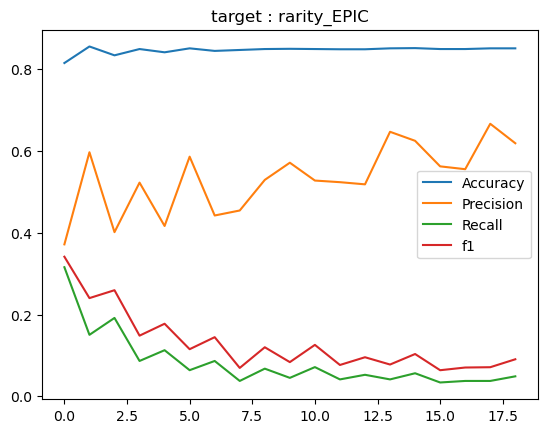

In [32]:
#rarity_EPIC
X_train, X_test, y_train, y_test = train_test_split(X,t3, test_size=0.3, stratify=t3)
split_accuracy = []
split_precision = []
split_recall = []
split_f1 = []
best_accuracy = 0
best_k = 0
print("lancer")
for i in range(1, 20, 1):
    #print(f"k={i}")
    knn = KNeighborsClassifier(n_neighbors=i, p=1)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    precision = precision_score(y_test, prediction)
    #print(f"Accuracy: {accuracy_score(y_test, prediction)}")
    split_accuracy.append(accuracy_score(y_test, prediction))
    split_precision.append(precision_score(y_test, prediction))
    split_recall.append(recall_score(y_test, prediction))
    split_f1.append(f1_score(y_test, prediction))

    if (i==10) : 
        accuracy = accuracy_score(y_test, prediction)
        precision = precision_score(y_test, prediction)
        recall = recall_score(y_test, prediction)
        f1 = f1_score(y_test, prediction)
        print(f" ========= target : rarity_EPIC")
        print(f"accuracy : {accuracy}")
        print("====================")
        print(f"precision : {precision}")
        print("====================")
        print(f"recall : {recall}")
        print("====================")
        print(f"f1-score : {f1}")
            
    if precision > best_accuracy:
        best_accuracy = precision
        best_k = i
print(f"Meilleur k avec la meilleure precision: k={best_k}, precision={best_accuracy}" )
plt.plot(split_accuracy, label="Accuracy")
plt.plot(split_precision, label="Precision")
plt.plot(split_recall, label="Recall")
plt.plot(split_f1, label="f1")
plt.legend()
plt.title("target : rarity_EPIC")

In [33]:
mean_acc = 0
mean_prec = 0
mean_rec = 0
mean_f1 = 0
kfold=KFold(n_splits=5,shuffle=True)
cross_val_accuracy = cross_val_score(estimator=knn, X=X, y=t3, scoring="accuracy", cv=kfold) 
mean_acc = cross_val_accuracy.mean()
cross_val_precision = cross_val_score(estimator=knn, X=X, y=t3, scoring="precision", cv=kfold)
mean_prec = cross_val_precision.mean()
cross_val_accuracy_std = cross_val_score(estimator=knn, X=X, y=t3, scoring="recall", cv=kfold)
mean_rec = cross_val_accuracy_std.mean()
cross_val_f1 = cross_val_score(estimator=knn, X=X, y=t3, scoring="f1", cv=kfold)
mean_f1 = cross_val_f1.mean()

print(f" ========= k-fold validation accuracy : {mean_acc}")
print(f" ========= k-fold validation precision : {mean_prec}")
print(f" ========= k-fold validation recall : {mean_rec}")
print(f" ========= k-fold validation f1-score : {mean_f1}")


 ========= k-fold validation accuracy : 0.8485885372112918
 ========= k-fold validation precision : 0.5206793206793207
 ========= k-fold validation recall : 0.03484620154636936
 ========= k-fold validation f1-score : 0.0773531029599629
